In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

We are looking at CLT for some distributions. 
We will use:
- Uniform
- Exponential
- Custom distribution I

We will plot the sum of 1, 2, 3, 5, 10, 50, 100 and 1000 sums of random variables from the above distributions sampled 100000 times.
The plot of 1 sum represents the distribution of the Random Variable itself, and is plotted for comparison.
As we increase the number of sums we can see the number of times a distribution is convolved with itself, and the distribution of the sum of the random variables approaches a normal distribution.


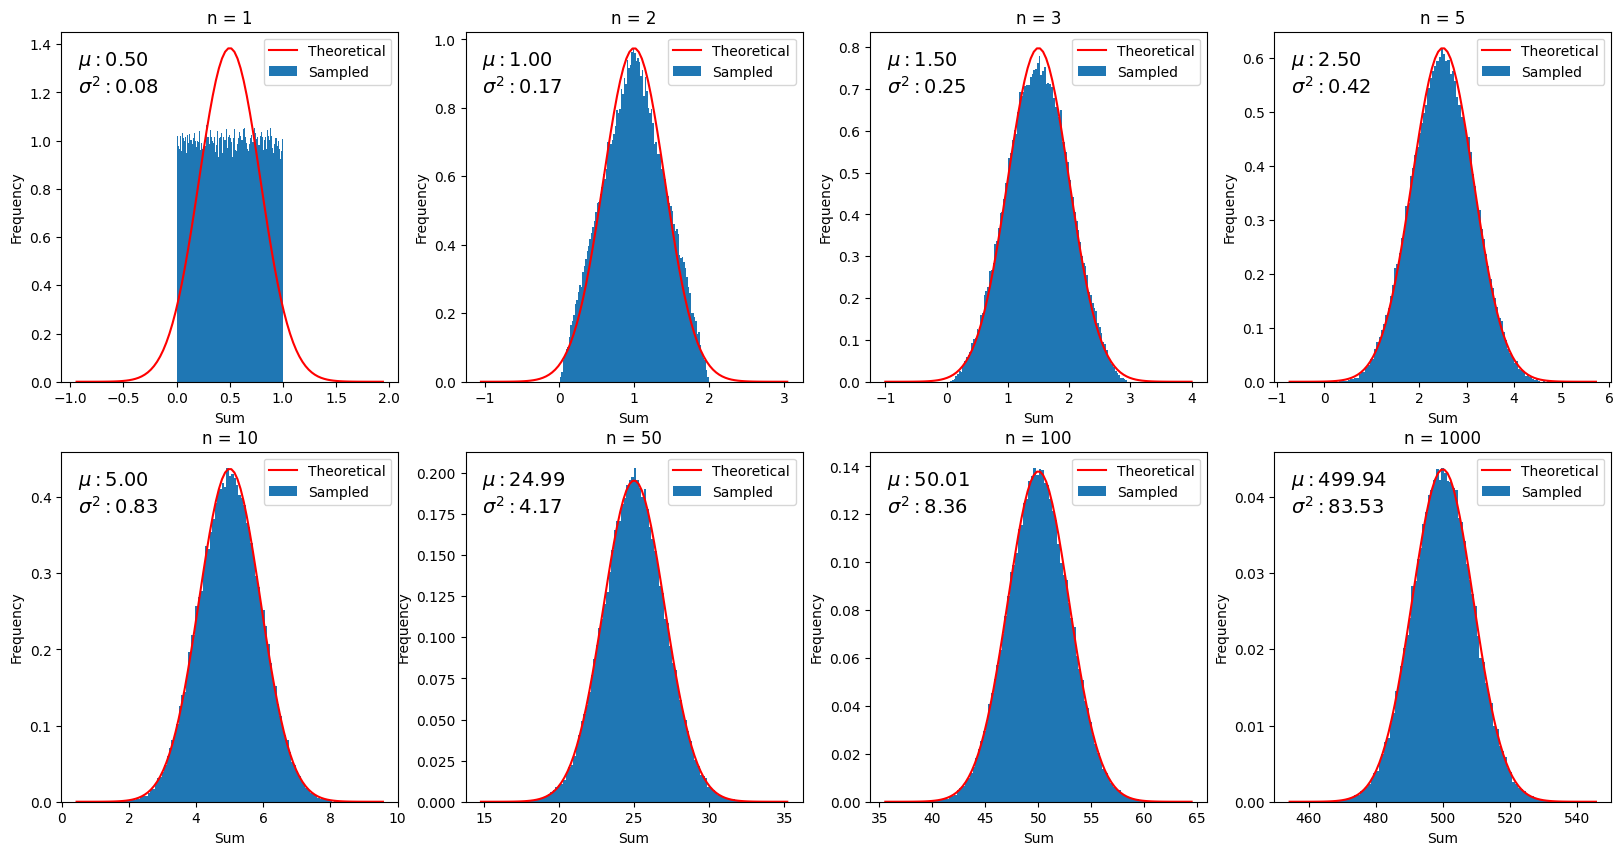

In [2]:
### Uniform Distribution
# sums to take
ns = [1, 2, 3, 5, 10, 50, 100, 1000]
# Our first distribution is a uniform distribution U[0, 1]
# We will let Y = sum of 10000 samples from this distribution and plot the histogram of the sums for each n
# Lets plot on subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i, n in enumerate(ns):
    # Generate 1000 samples from the uniform distribution and sum them
    sampledY = np.sum(np.random.uniform(size=(100000, n)), axis=1)
    # Plot the histogram of the sums and use the density parameter to normalize the histogram
    axs[i].hist(sampledY, bins=100, density=True)
    # Lets also plot the theoretical distribution by finding the mean and variance of the sum
    mean, var = np.mean(sampledY), np.var(sampledY)
    x = np.linspace(mean - 5 * np.sqrt(var), mean + 5 * np.sqrt(var), 100)
    axs[i].plot(x, np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var), 'r')
    # Set the title and labels and such
    axs[i].set_title('n = {}'.format(n))
    axs[i].text(0.05, 0.95, (r'$\mu: {:.2f}$' +"\n" + r'$\sigma^2: {:.2f}$').format(mean, var), transform=axs[i].transAxes, fontsize=14, verticalalignment='top')
    axs[i].set_xlabel('Sum')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(['Theoretical', 'Sampled'])
plt.show()


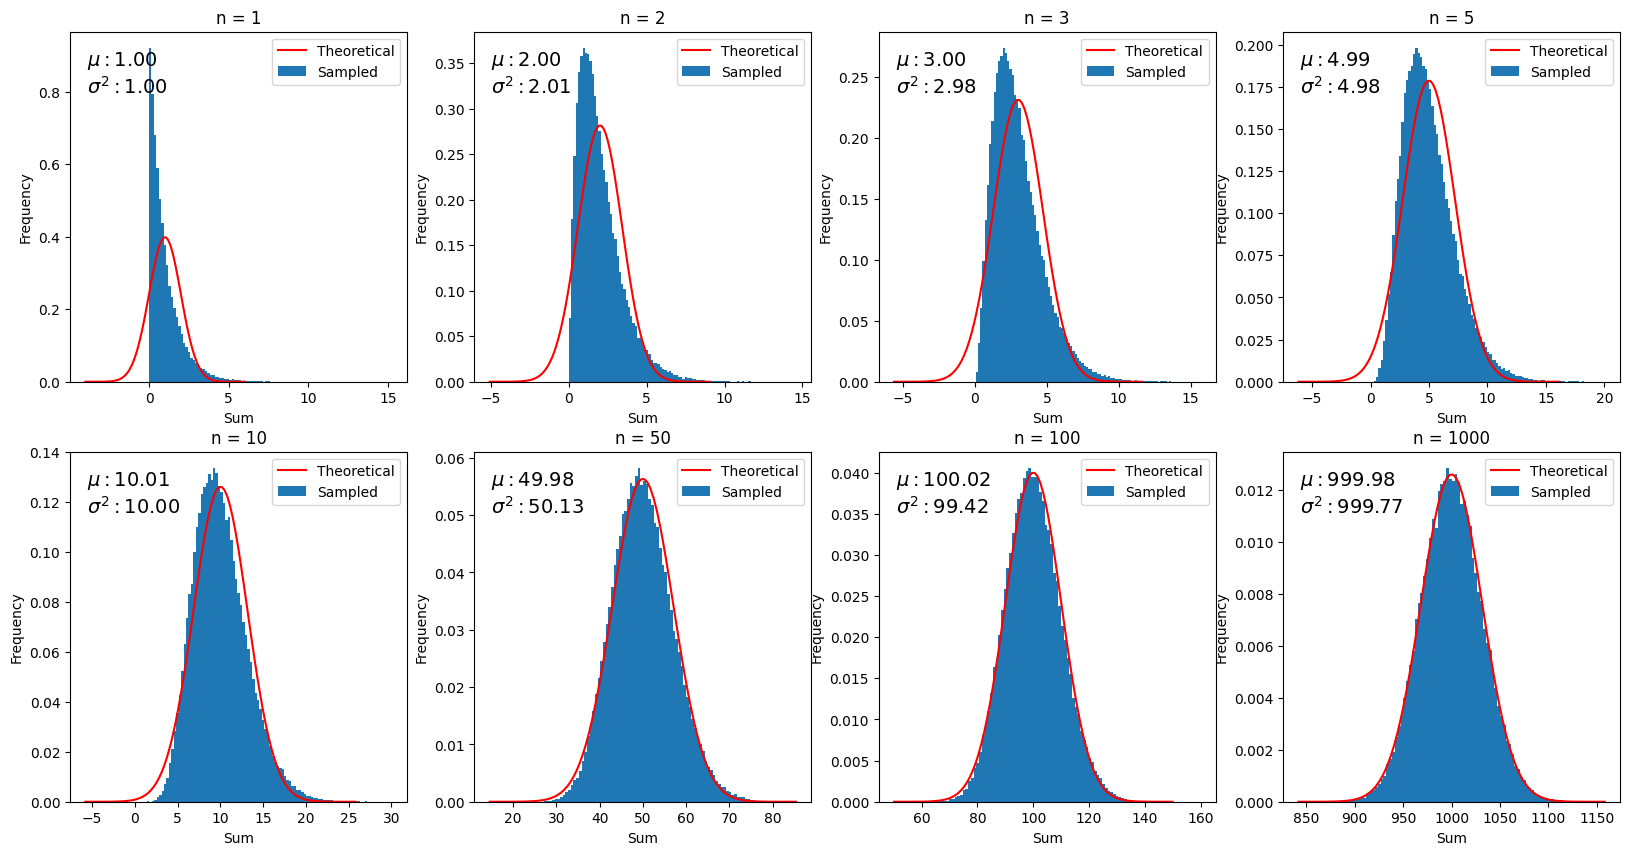

In [3]:
### Exponential Distribution
# Our second distribution is an exponential distribution with lambda = 1
# We will let Y = sum of 10000 samples from this distribution and plot the histogram of the sums for each n
# Lets plot on subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i, n in enumerate(ns):
    # Generate 1000 samples from the uniform distribution and sum them
    sampledY = np.sum(np.random.exponential(size=(100000, n)), axis=1)
    # Plot the histogram of the sums and use the density parameter to normalize it, so that the area under the curve is 1
    axs[i].hist(sampledY, bins=100, density=True)
    # Lets also plot the theoretical distribution by finding the mean and variance of the sum
    mean, var = np.mean(sampledY), np.var(sampledY)
    x = np.linspace(mean - 5 * np.sqrt(var), mean + 5 * np.sqrt(var), 100)
    axs[i].plot(x, np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var), 'r')
    # Set the title and labels and such
    axs[i].set_title('n = {}'.format(n))
    axs[i].text(0.05, 0.95, (r'$\mu: {:.2f}$' +"\n" + r'$\sigma^2: {:.2f}$').format(mean, var), transform=axs[i].transAxes, fontsize=14, verticalalignment='top')
    axs[i].set_xlabel('Sum')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(['Theoretical', 'Sampled'])
plt.show()

In [4]:
class CustomDist3():
    # This will be a custom implementation using inverse CDF sampling and saving a table of values
    def __init__(self, integral_samples = 10000):
        self.integral_samples = integral_samples
        self.x_s = np.linspace(-10, 10, integral_samples)

    def pdf(self, x):
        # Normalized piecewise function
        # We need to normalize the function so that the integral is 1, which makes the lim x->inf of the cdf 1, which we need to make the inverse cdf work
        return 0.334842501293*np.piecewise(x, [(np.logical_or(x >= 5, x <= -5)), np.logical_and(x < 5, x > -5)], [lambda x: np.exp(10-2*np.abs(x)), lambda x: np.exp(-5+np.abs(x))])

    def cdf(self, x):
        # Use integration to find the cdf
        # We will use the trapezoidal rule
        int_s = np.linspace(-10, x, self.integral_samples)
        return integrate.trapz(self.pdf(int_s), int_s)
    
    def inverse_cdf(self, x):
        # Use interpolation to find the inverse cdf
        return np.interp(x, self.cdf(self.x_s), self.x_s)
    
    def rvs(self, size):
        # Sample a U[0, 1] distribution and use the inverse cdf to get samples from our distribution
        return self.inverse_cdf(np.random.uniform(size=size))

100%|██████████| 8/8 [01:18<00:00,  9.86s/it]


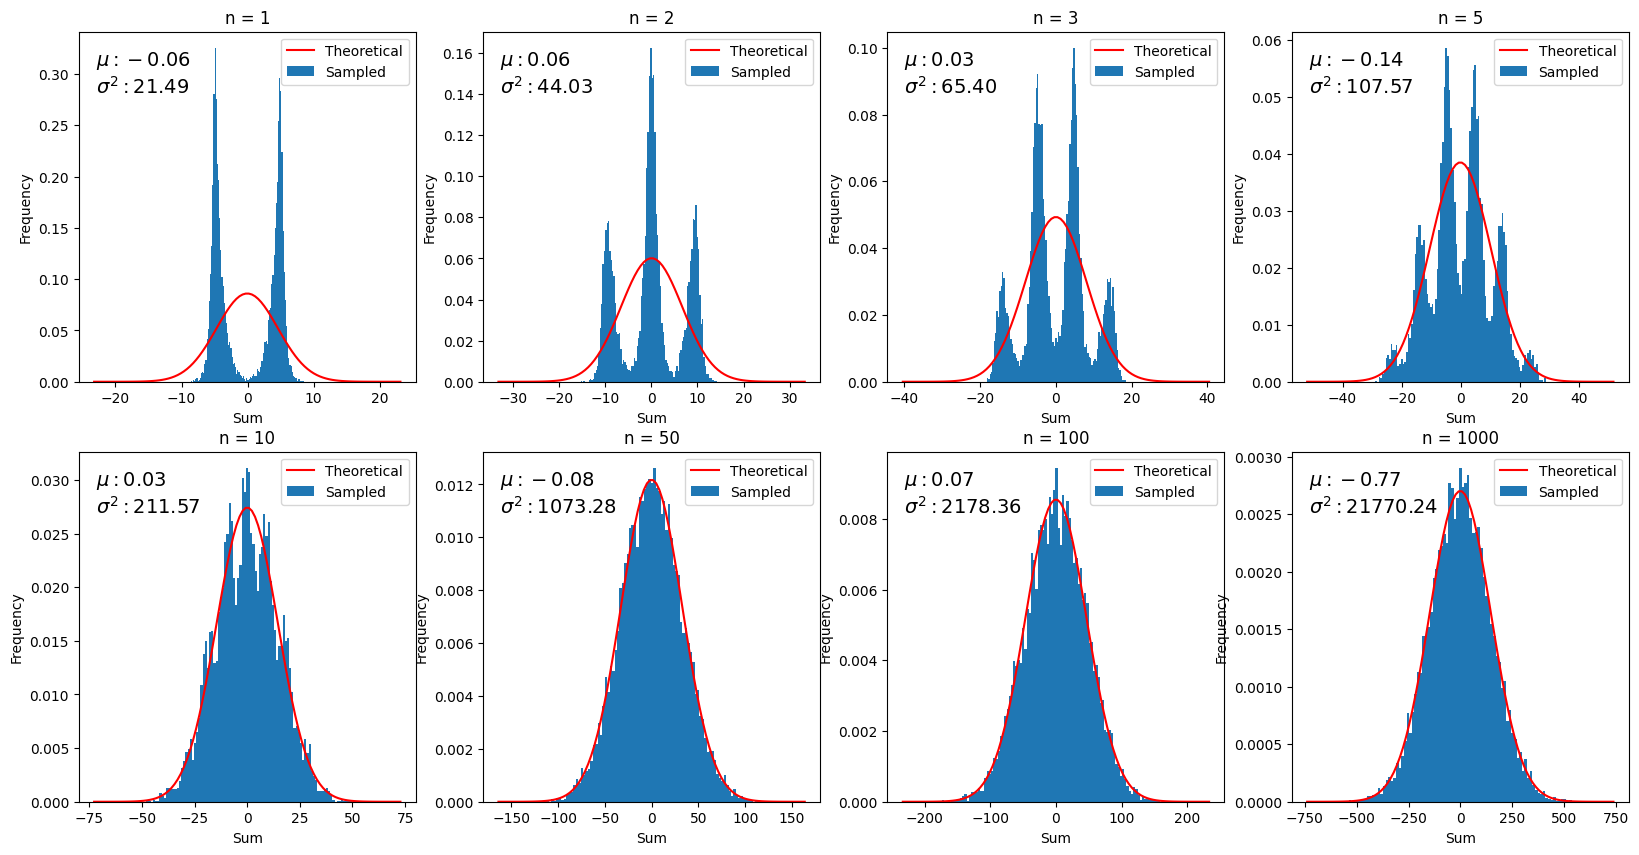

In [5]:
### Custom Distribution
# Our third distribution is a custom distribution
# We will let Y = sum of 10000 samples from this distribution and plot the histogram of the sums for each n
# Lets plot on subplots
import tqdm # This is a progress bar library to show how long the code will take to run. So that we can stop it if it is taking too long
custom_dist3 = CustomDist3()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i, n in (enumerate(tqdm.tqdm(ns))):
    # Generate 1000 samples from the uniform distribution and sum them
    sampledY = np.sum(custom_dist3.rvs(size=(10000, n)), axis=1)
    # Plot the histogram of the sums and use the density parameter to normalize it, so that the area under the curve is 1
    axs[i].hist(sampledY, bins=100, density=True)
    # Lets also plot the theoretical distribution by finding the mean and variance of the sum
    mean, var = np.mean(sampledY), np.var(sampledY)
    x = np.linspace(mean - 5 * np.sqrt(var), mean + 5 * np.sqrt(var), 100)
    axs[i].plot(x, np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var), 'r')
    # Set the title and labels and such
    axs[i].set_title('n = {}'.format(n))
    axs[i].text(0.05, 0.95, (r'$\mu: {:.2f}$' +"\n" + r'$\sigma^2: {:.2f}$').format(mean, var), transform=axs[i].transAxes, fontsize=14, verticalalignment='top')
    axs[i].set_xlabel('Sum')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(['Theoretical', 'Sampled'])
plt.show()


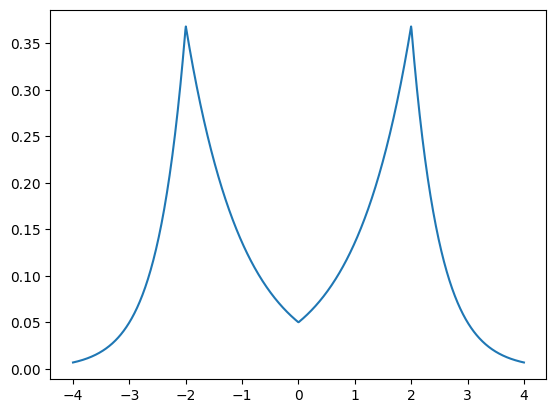

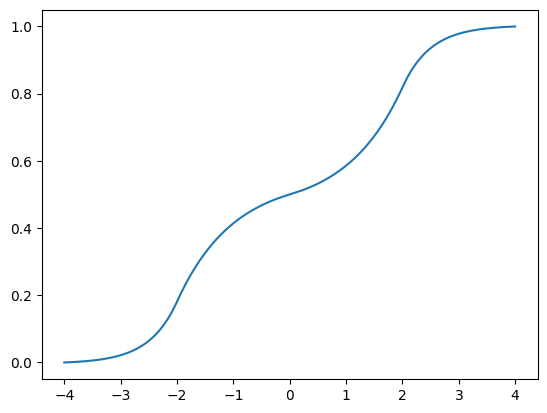

In [6]:
### IGNORE: This is a testing function to find an implementation for the custom distribution without using scipy since it is slow
# Plot this lambda function
import scipy.integrate as integrate
x_s = np.linspace(-4, 4, 1000)
def pdf(x):
    return 0.368865*np.piecewise(x, [(np.logical_or(x >= 2, x <= -2)), np.logical_and(x < 2, x > -2)], [lambda x: np.exp(4-2*np.abs(x)), lambda x: np.exp(-2+np.abs(x))])

def cdf(x):
    # Use integration to find the cdf
    # We will use the trapezoidal rule
    # We will use 10000 points to approximate the integral
    int_s = np.linspace(-4, x, 1000)
    return integrate.trapz(pdf(int_s), int_s)

plt.plot(x_s, pdf(x_s))
plt.show()
plt.plot(x_s, cdf(x_s))
plt.show()
# With this, we can create an inverse cdf and sample a U[0, 1] distribution to get samples from our custom distribution, which is what we use above

